In [59]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras import Sequential



In [60]:
path = "C:\\Users\\ajha7\\OneDrive\\Desktop\\Cnn project\\img"


In [61]:
import os

if os.path.exists(path):
    dirs = os.listdir(path)
    for dir in dirs:
        dir_path = os.path.join(path, dir)
        if os.path.isdir(dir_path):
            files = os.listdir(dir_path)
            print(f"{dir} folder has {len(files)} images")
else:
    print(f"Error: The directory '{path}' does not exist.")


daisy folder has 764 images
dandelion folder has 1052 images
rose folder has 784 images
sunflower folder has 733 images
tulip folder has 984 images


In [62]:
base_dir = path = r"C:\Users\ajha7\OneDrive\Desktop\Cnn project\img"

img_size = 180
batch = 32

In [63]:
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed = 13,
                                                        validation_split = 0.2,
                                                        subset = 'training',
                                                        batch_size = batch,
                                                        image_size =(img_size,img_size))


val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed = 13,
                                                        validation_split = 0.2,
                                                        subset = 'validation',
                                                        batch_size = batch,
                                                        image_size =(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [64]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [65]:
flower_names = train_ds.class_names

In [66]:
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

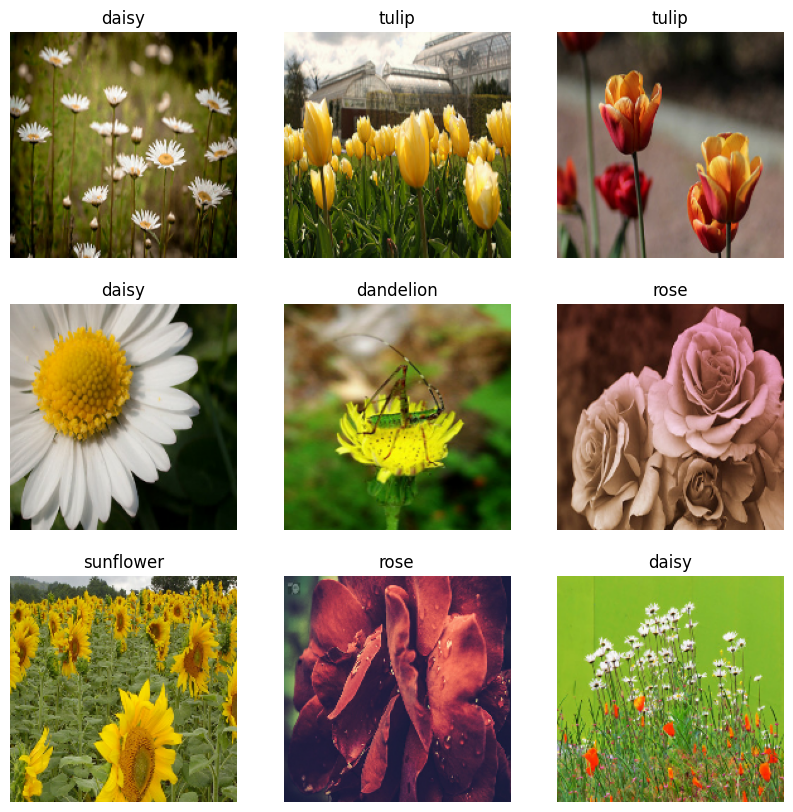

In [67]:
import matplotlib.pyplot as plt
i=0
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')


In [68]:
AUTOTUNE = tf.data.AUTOTUNE

In [69]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [70]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [71]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
data_augmentation = Sequential([
    RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),  
          RandomRotation(0.1),
    RandomZoom(0.1)
])


c:\Users\ajha7\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


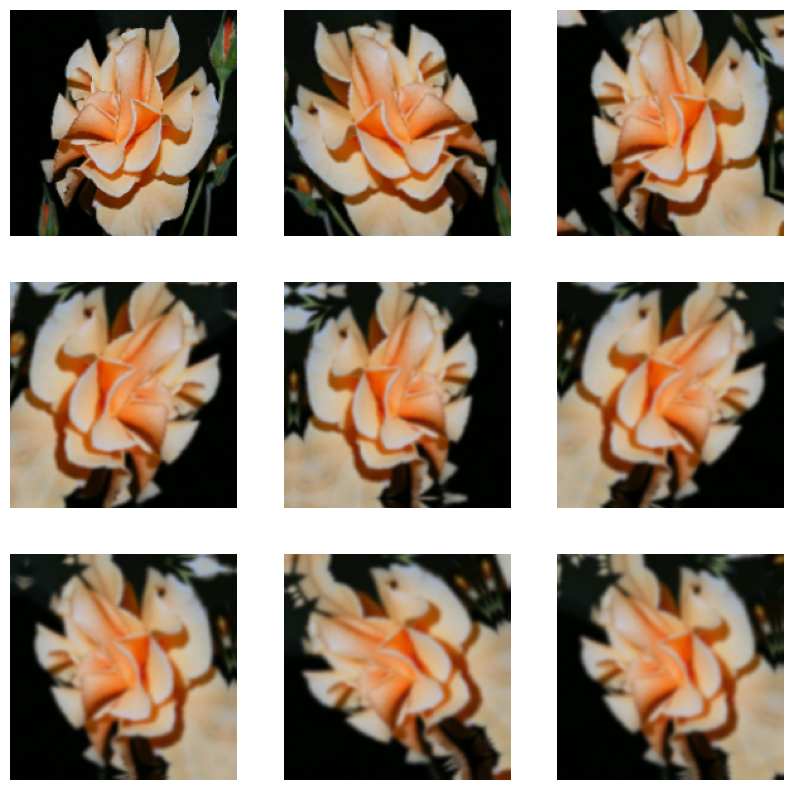

In [72]:
import matplotlib.pyplot as plt
i=0
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):

        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')


In [76]:

model = Sequential([
    data_augmentation,   # Data augmentation layer
    layers.Rescaling(1./255),  # Normalize pixel values

    # Convolutional layers
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Dropout(0.2),  # Dropout to reduce overfitting
    
    layers.Flatten(),  # Flatten feature maps into a vector
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(5, activation='softmax')  # Output layer with 5 classes
])


In [81]:
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
matrics = ['accuracy']
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # from_logits=False by default
    metrics=['accuracy']  # Fixed typo
)



In [82]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [83]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 180ms/step - accuracy: 0.3961 - loss: 1.4004 - val_accuracy: 0.5933 - val_loss: 1.0313
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 162ms/step - accuracy: 0.5586 - loss: 1.0529 - val_accuracy: 0.6234 - val_loss: 0.9565
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 18s 171ms/step - accuracy: 0.6164 - loss: 0.9796 - val_accuracy: 0.6698 - val_loss: 0.8751
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 149ms/step - accuracy: 0.6541 - loss: 0.8985 - val_accuracy: 0.6338 - val_loss: 0.9201
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 144ms/step - accuracy: 0.6457 - loss: 0.8637 - val_accuracy: 0.6767 - val_loss: 0.9111
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 145ms/step - accuracy: 0.6779 - loss: 0.8192 - val_accuracy: 0.6686 - val_loss: 0.8334
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 145ms/step - accuracy: 0.7209 - loss: 0.7468 - val_accuracy: 0.6779 - val_loss: 0.8680
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 145ms/step - accuracy: 0.7238 - loss: 0

In [87]:
def classify_images(image_path):
    input_images = tf.keras.utils,load_img(image_path, target_size=(180,180))
    input_images_array = tf.keras.utils.img_to_array(input_images)
    input_images_exp_dim = tf.expand_dims(input_images_array, 0)

    predictions = model.predict(input_images_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'theflower blongs to '+ flower_names[np.arg(result)]+ 'with a score of'+ str(max(result)*100)
    return outcome

In [89]:
classify_images(r"C:\Users\ajha7\OneDrive\Desktop\Cnn project\sample\sunflower.jpg")


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.